In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Atomcamp/cars_price - cars_price.csv', na_values='?')

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,NaN,2548.0,dohc,NaN,NaN,mpfi,3.47,2.68,9.0,111.0,NaN,21.0,27.0,13495.0
1,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,NaN,four,130.0,mpfi,3.47,2.68,9.0,111.0,NaN,21.0,27.0,16500.0
2,1.0,NaN,alfa-romero,gas,std,two,hatchback,rwd,NaN,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,NaN,3.47,9.0,154.0,NaN,19.0,26.0,16500.0
3,2.0,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,NaN,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,audi,gas,std,NaN,sedan,4wd,front,99.4,NaN,NaN,54.3,2824.0,NaN,five,136.0,mpfi,NaN,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30330 entries, 0 to 30329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          27286 non-null  float64
 1   normalized-losses  21768 non-null  float64
 2   make               27228 non-null  object 
 3   fuel-type          27309 non-null  object 
 4   aspiration         27355 non-null  object 
 5   num-of-doors       27061 non-null  object 
 6   body-style         27326 non-null  object 
 7   drive-wheels       27215 non-null  object 
 8   engine-location    27352 non-null  object 
 9   wheel-base         27264 non-null  float64
 10  length             27258 non-null  float64
 11  width              27387 non-null  float64
 12  height             27281 non-null  float64
 13  curb-weight        27302 non-null  float64
 14  engine-type        27285 non-null  object 
 15  num-of-cylinders   27298 non-null  object 
 16  engine-size        272

In [ ]:
df.nunique()

,0
symboling,6
normalized-losses,51
make,22
fuel-type,2
aspiration,2
num-of-doors,2
body-style,5
drive-wheels,3
engine-location,2
wheel-base,53


### Removing duplicates

In [ ]:
df.duplicated().sum()

np.int64(4629)

In [ ]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)

### Data Inconsistencies

In [ ]:
#Checking the unique values in every column
for i in df.columns:
  print(i)
  print(df[i].value_counts())
  print('_____________________________________________________')



index
index
30329    1
0        1
1        1
2        1
3        1
        ..
9        1
8        1
7        1
6        1
5        1
Name: count, Length: 25701, dtype: int64
_____________________________________________________
symboling
symboling
 0.0    7492
 1.0    5935
 2.0    3576
 3.0    3047
-1.0    2431
-2.0     316
Name: count, dtype: int64
_____________________________________________________
normalized-losses
normalized-losses
161.0    1294
91.0      870
150.0     781
104.0     710
134.0     678
128.0     645
102.0     606
94.0      570
85.0      557
65.0      546
95.0      538
168.0     535
103.0     529
74.0      514
93.0      468
106.0     459
122.0     435
148.0     431
118.0     413
125.0     346
137.0     338
83.0      325
154.0     322
115.0     318
101.0     311
197.0     248
153.0     242
188.0     238
145.0     236
113.0     233
119.0     232
108.0     232
81.0      230
194.0     228
110.0     227
129.0     225
89.0      214
87.0      209
158.0     207
164.0     20

#### I found these data inconsistencies:
* Instead of NaN, there's '?' as missing data, so i handles this in pd.read_cv
* Engine-type: dohcv seem to be a typo of dohc
* fuel-system: mfi and spdi seem typo of mpfi and spfi respectively. Upon researching, I found that spdi is very uncommon, probably an older version, and mfi term was also not found anywhere on the internet

In [ ]:
#Replacing the uncommon versions with the common ones

df['engine-type'].replace('dohcv', 'dohc', inplace=True)

df['fuel-system'].replace('mfi', 'mpfi', inplace=True)

df['fuel-system'].replace('spdi', 'spfi', inplace=True)

### Missing values

In [ ]:
df.isnull().sum()/len(df)*100

,0
index,0.000000
symboling,11.299171
normalized-losses,28.909381
make,11.513171
fuel-type,11.217462
aspiration,11.050154
num-of-doors,12.092915
body-style,11.155208
drive-wheels,11.610443
engine-location,11.077390


array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'normalized-losses'}>,
        <Axes: title={'center': 'wheel-base'}>],
       [<Axes: title={'center': 'length'}>,
        <Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb-weight'}>],
       [<Axes: title={'center': 'engine-size'}>,
        <Axes: title={'center': 'bore'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compression-ratio'}>],
       [<Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'peak-rpm'}>,
        <Axes: title={'center': 'city-mpg'}>,
        <Axes: title={'center': 'highway-mpg'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

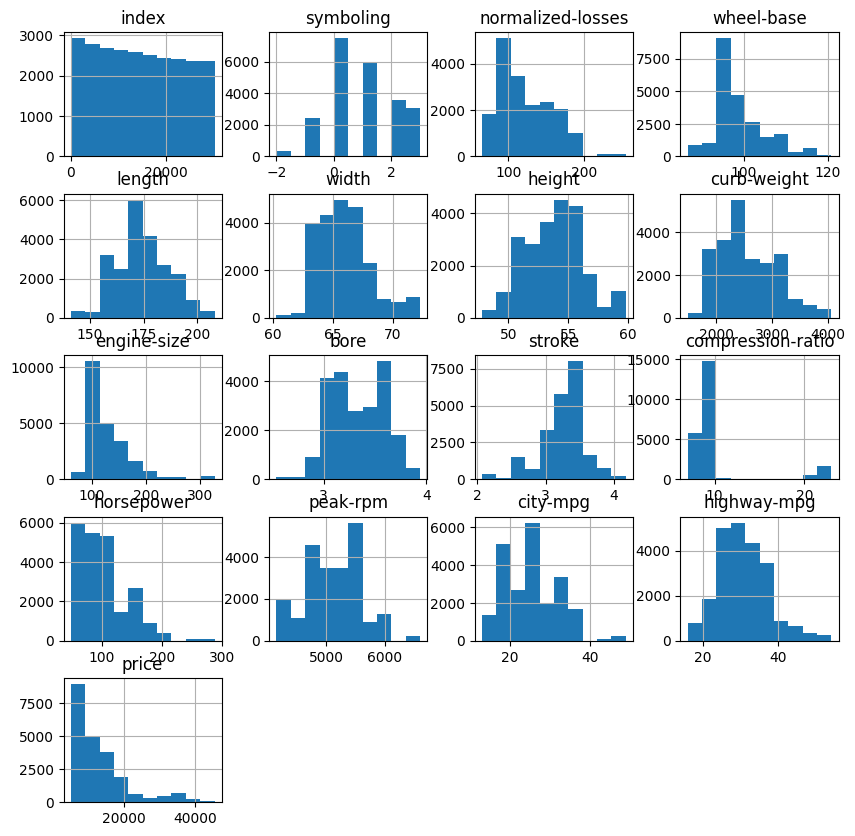

In [ ]:
# Checking distribution of data
df.hist(figsize=(10,10))

#### Checking outliers



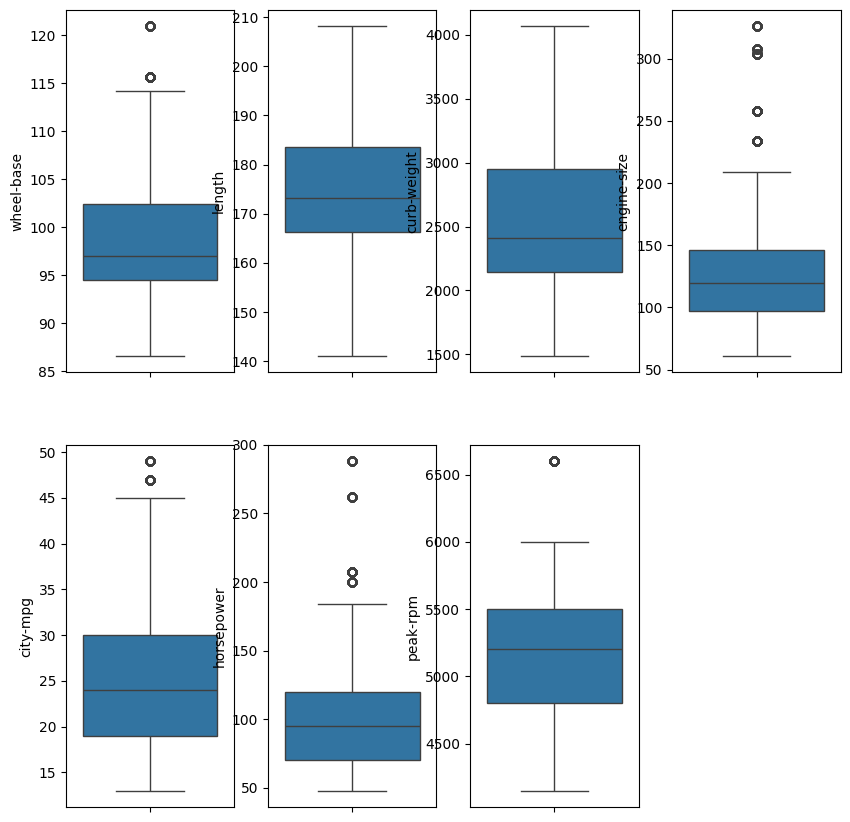

In [ ]:
#Checking outliers through boxplots of selected_col of columns that I think have outliers
selected_col = df[['wheel-base',	'length',	'curb-weight',	'engine-size',	'city-mpg',	'horsepower', 'peak-rpm']]

plt.figure(figsize=(10,16))
i=1
for col in selected_col.columns:
  plt.subplot(3,4,i)
  sns.boxplot(y=selected_col[col])
  i+=1



## Data Visualization and understanding relationships between variables

#### Chart 1 - Correlation of Variables

<Axes: >

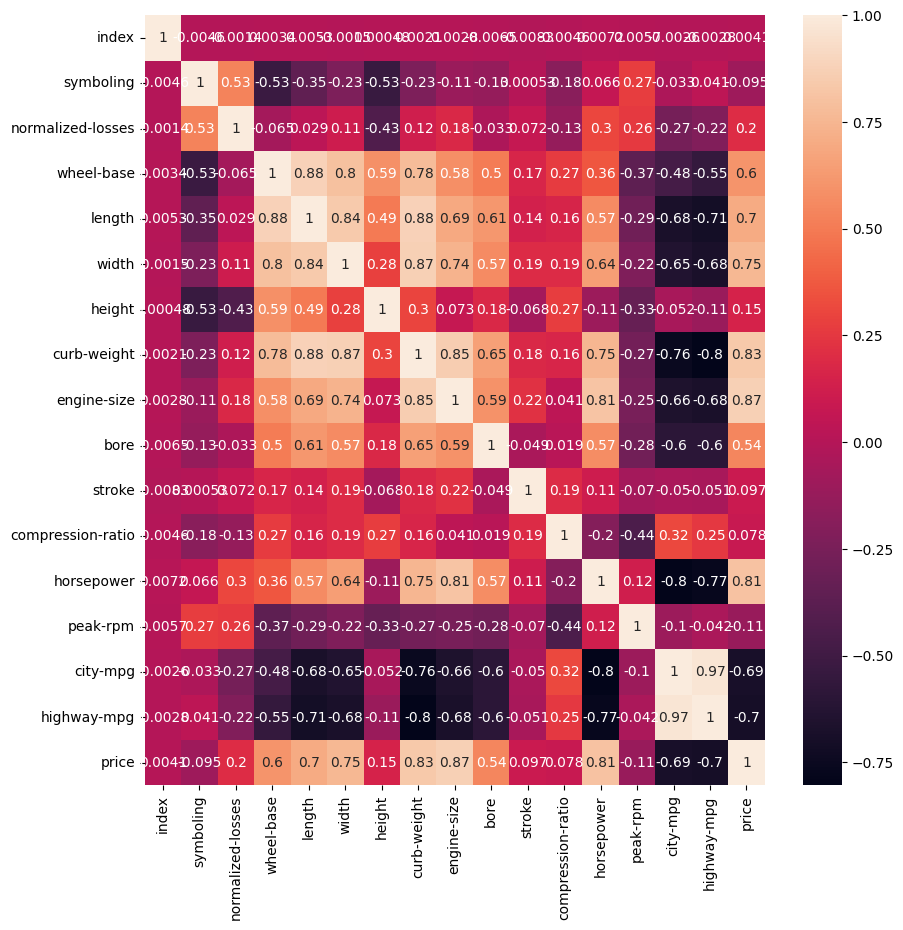

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

In [ ]:
# Assignment Ques 9: Using a pivot table, find the average price for different fuel types.
price_by_fuel = pd.pivot_table(df, index=['fuel-type'], values=['price'], aggfunc='mean')
print(price_by_fuel)



                  price
fuel-type              
diesel     16044.352850
gas        12897.241989


In [ ]:
# Assignment Ques 10: 10. Use groupby() to analyze the average price for different car brands.
price_by_brand = df.groupby(by='make')['price'].mean()
print(price_by_brand.sort_values())

make
chevrolet         5984.047923
dodge             7904.068493
plymouth          8092.631040
honda             8218.807784
subaru            8607.018730
isuzu             9034.321608
mitsubishi        9158.194883
renault           9553.100559
volkswagen        9995.655114
toyota           10039.919099
nissan           10576.102535
mazda            10592.689593
saab             15317.619808
peugot           15427.703196
alfa-romero      15562.847458
mercury          16503.000000
audi             17816.920354
volvo            18180.582852
bmw              26672.350746
porsche          31090.814208
mercedes-benz    33581.026820
jaguar           34360.750853
Name: price, dtype: float64


#### Chart 2 - Top  10 Most selling Car brands

<Axes: xlabel='make', ylabel='count'>

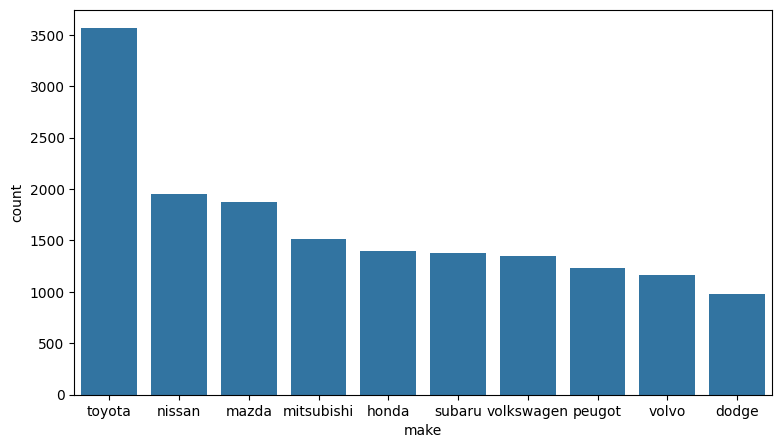

In [ ]:
top10 = df['make'].value_counts()[:10]
plt.figure(figsize=(9,5))
sns.countplot(df, x='make', order=top10.index)


#### Chart 3 - Distribution of Categorical Variables

Text(0.5, 1.0, 'Count of Different Cylinder Numbers')

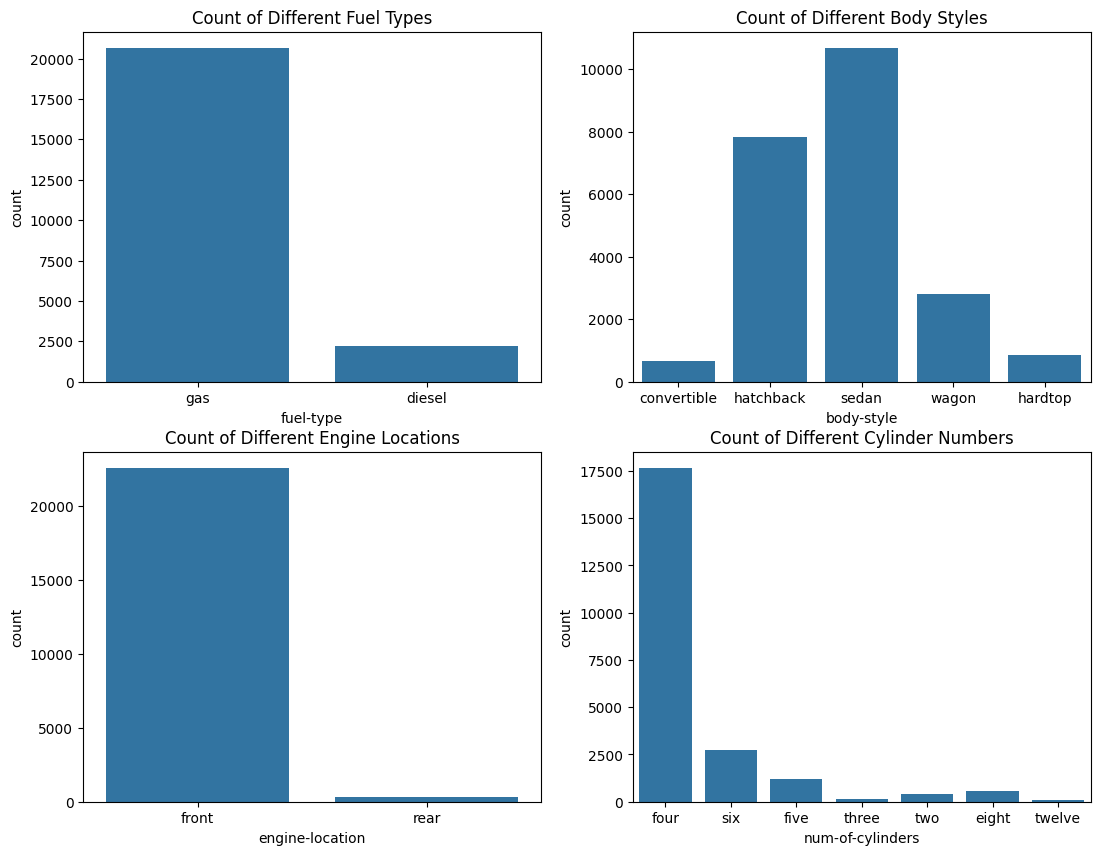

In [ ]:
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
sns.countplot(df, x='fuel-type')
plt.title('Count of Different Fuel Types')

plt.subplot(2,2,2)
sns.countplot(df, x='body-style')
plt.title('Count of Different Body Styles')

plt.subplot(2,2,3)
sns.countplot(df, x='engine-location')
plt.title('Count of Different Engine Locations')

plt.subplot(2,2,4)
sns.countplot(df, x='num-of-cylinders')
plt.title('Count of Different Cylinder Numbers')


#### Insights found from the chart:
* Almost all vehicles run on Gas, only some run on Diesel
* Engine is also located on the fron t on almost all cars
* More than half of cars have 4 cylinders


#### Chart 5 - Categorical variables vs Target Variable (Price)

Text(0.5, 1.0, 'Count of Different Cylinder Numbers')

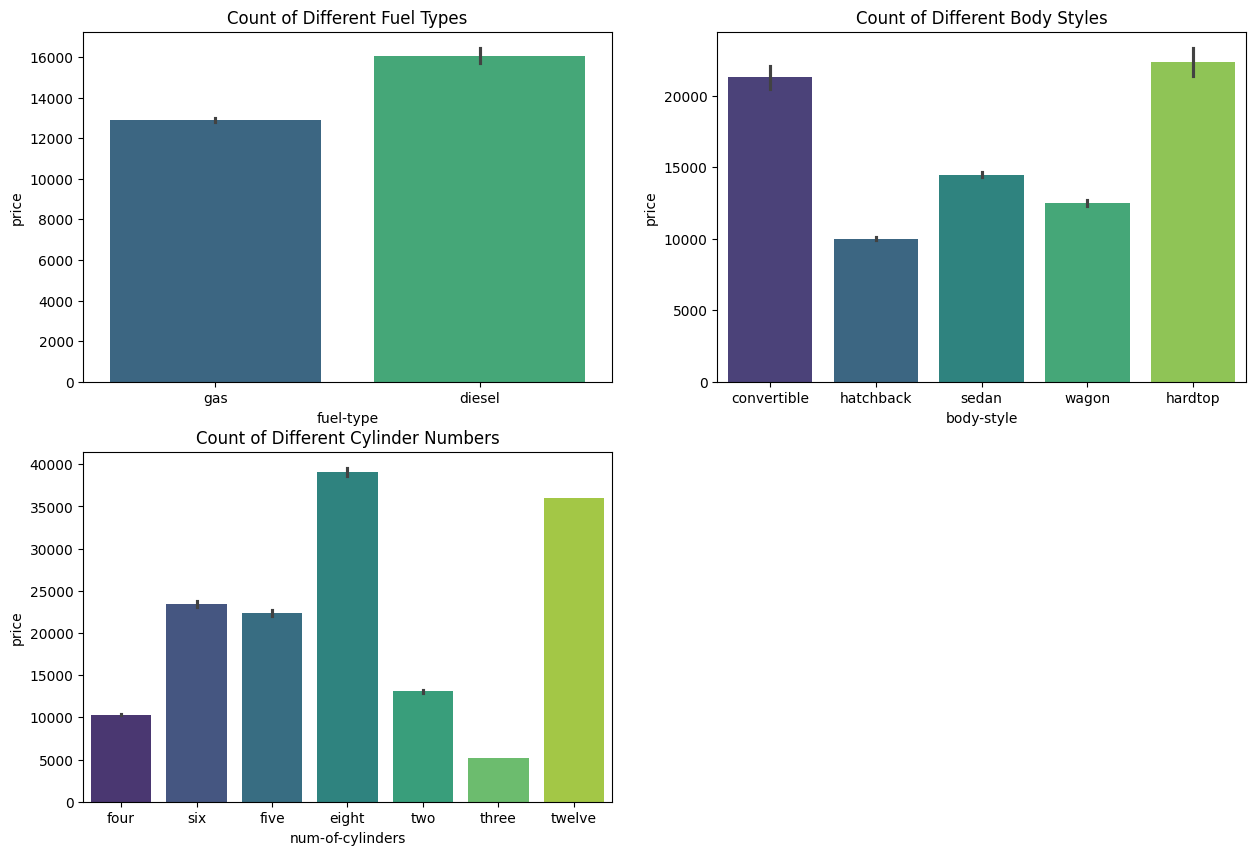

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.barplot(df, x='fuel-type', y='price', palette='viridis')
plt.title('Count of Different Fuel Types')

plt.subplot(2,2,2)
sns.barplot(df, x='body-style', y='price', palette='viridis')
plt.title('Count of Different Body Styles')

plt.subplot(2,2,3)
sns.barplot(df, x='num-of-cylinders', y='price', palette='viridis', order=df['num-of-cylinders'].value_counts().index)
plt.title('Count of Different Cylinder Numbers')


Text(0.5, 1.0, 'Count of Different Engine Locations')

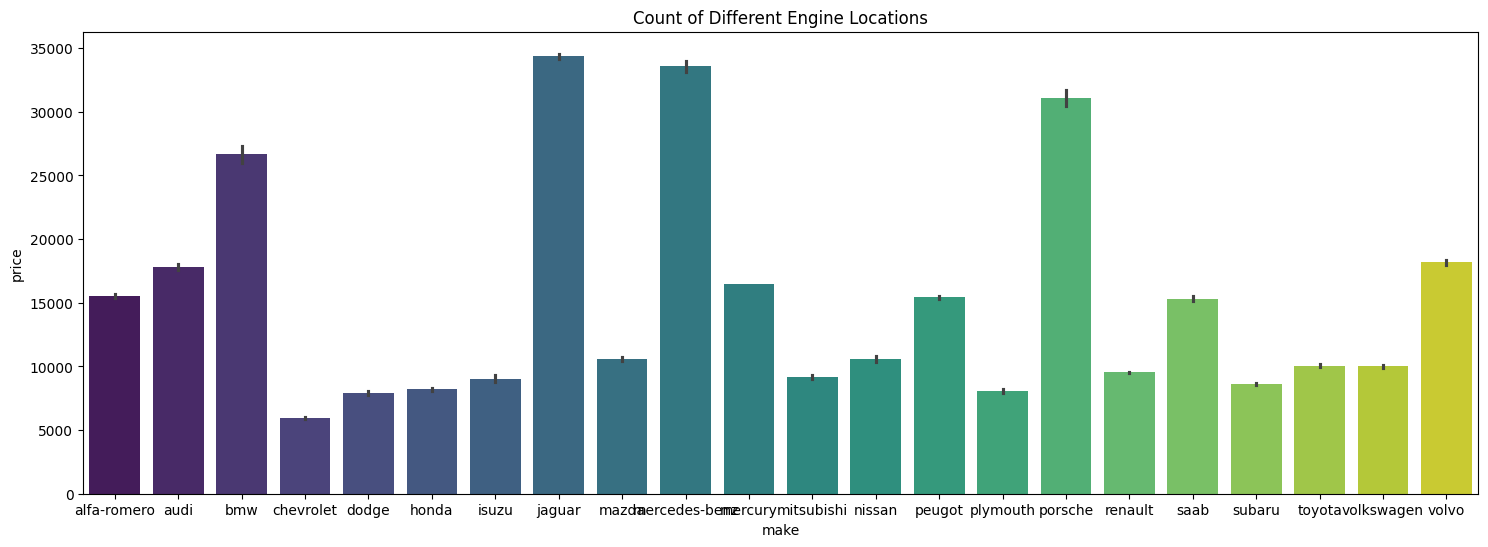

In [ ]:
# Chart of price by car brand
plt.figure(figsize=(18,6))
sns.barplot(df, x='make', y='price', palette='viridis')
plt.title('Count of Different Engine Locations')

#### Insights
* Gas vehicles are a little cheaper than diesel vehicles
* Convertible and Hardtop are most expensive cars, hatchback are cheapest
* Rear engines are way more expensive than front located ones
* More cylinders mean more price

#### Plot -6: Checking linearity between variables and Target variable

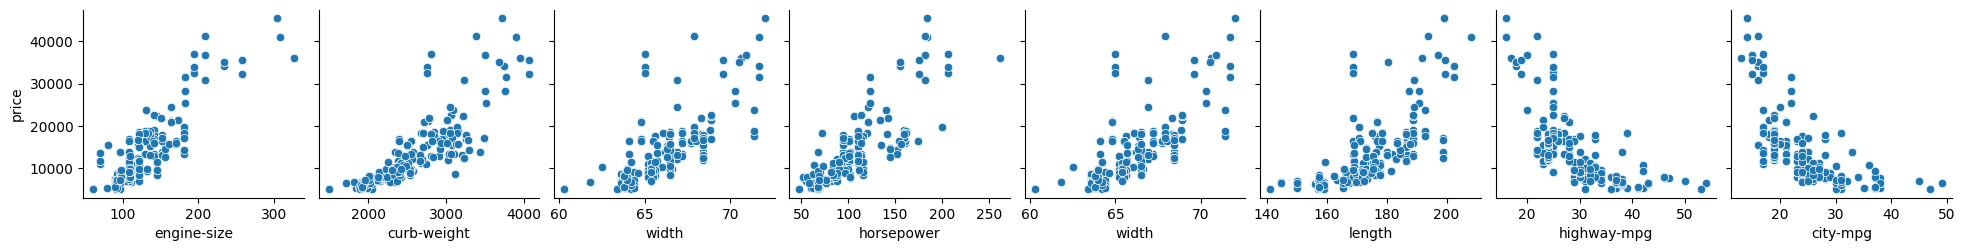

In [ ]:
#Checking linearity between inputs
sns.pairplot(df, x_vars=['engine-size', 'curb-weight', 'width', 'horsepower', 'width', 'length', 'highway-mpg', 'city-mpg'], y_vars=['price'])

#### Insights
Most are linear with 'price', but some have exponential relationship such as 'length', 'highway-mpg', 'city-mpg'.

It indicates that linear regression might not work well with this dataset.

# Feature Engineering and Data Preprocessing

### 1. Dropping Features with negligible correlation

In [ ]:
df.drop(['symboling', 'normalized-losses', 'height', 'stroke', 'compression-ratio', 'peak-rpm' ], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

,0
index,0
make,2959
fuel-type,2883
aspiration,2840
num-of-doors,3108
body-style,2867
drive-wheels,2984
engine-location,2847
wheel-base,2939
length,2945


### 2 .Handling Missing values

In [ ]:
# HANDLING NUMERIC DATA

# Replacing the skewed columns with median value
col_with_median =['wheel-base', 'engine-size', 'horsepower', 'price']
df[col_with_median] = df[col_with_median].fillna(df[col_with_median].median())

# Replacing the normal columns with the mean value
col_with_mean =['length', 'width', 'curb-weight', 'bore', 'city-mpg', 'highway-mpg']
df[col_with_mean] = df[col_with_mean].fillna(df[col_with_mean].mean())

# HANDLING CATEGORICAL DATA

# Replacing with 'Unknown' because the mode value has low frequency
col_with_unknown =['make', 'body-style', 'drive-wheels', 'fuel-system']
df[col_with_unknown] = df[col_with_unknown].fillna('Unknown')

# Replacing NaN with 0 because i will replace the values with numeric values later
df['num-of-cylinders'] = df['num-of-cylinders'].fillna(0)
df['num-of-doors'] = df['num-of-doors'].fillna(0)

# Replacing with mode value because v high frequency of the mode value as compared to the missing value
df['fuel-type'] = df['fuel-type'].fillna('gas')
df['aspiration'] = df['aspiration'].fillna('std')
df['engine-location'] = df['engine-location'].fillna('front')
df['engine-type'] = df['engine-type'].fillna('ohc')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25701 entries, 0 to 25700
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             25701 non-null  int64  
 1   make              25701 non-null  object 
 2   fuel-type         25701 non-null  object 
 3   aspiration        25701 non-null  object 
 4   num-of-doors      25701 non-null  object 
 5   body-style        25701 non-null  object 
 6   drive-wheels      25701 non-null  object 
 7   engine-location   25701 non-null  object 
 8   wheel-base        25701 non-null  float64
 9   length            25701 non-null  float64
 10  width             25701 non-null  float64
 11  curb-weight       25701 non-null  float64
 12  engine-type       25701 non-null  object 
 13  num-of-cylinders  25701 non-null  object 
 14  engine-size       25701 non-null  float64
 15  fuel-system       25701 non-null  object 
 16  bore              25701 non-null  float6

### 3. Handling Outliers

In [ ]:
#function for detect outliers in data, base on IQR criterion

def outlier_func(data):
  data=np.array(data)
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  return (data < lower_bound) |(data > upper_bound)

#Applying outlier function to every column in the dataset
df_out = pd.DataFrame()
for column in df.select_dtypes(include='number'):
  df_out[column] = outlier_func(df[column])

In [ ]:
# If any row and more than 3 outlier features, I'll drop the row
row_sum = df_out.sum(axis=1)
outlier_feature = 3
df = df[df_out.sum(axis=1) <5]

'''for i in range(len(df)):
  if row_sum[i] >= outlier_feature:
    df = df.drop(i)'''


'for i in range(len(df)):\n  if row_sum[i] >= outlier_feature:\n    df = df.drop(i)'

* I set upper and lower limits through IQR method and calculated outliers which went beyond these limits.
* Through row_sum, I checked how many outliers are in each row. Then i decided that if a row has more than 3 outlier features, it should be considered as an extreme point and be removed. Around 2000 values were removed

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25131 entries, 0 to 25700
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             25131 non-null  int64  
 1   make              25131 non-null  object 
 2   fuel-type         25131 non-null  object 
 3   aspiration        25131 non-null  object 
 4   num-of-doors      25131 non-null  object 
 5   body-style        25131 non-null  object 
 6   drive-wheels      25131 non-null  object 
 7   engine-location   25131 non-null  object 
 8   wheel-base        25131 non-null  float64
 9   length            25131 non-null  float64
 10  width             25131 non-null  float64
 11  curb-weight       25131 non-null  float64
 12  engine-type       25131 non-null  object 
 13  num-of-cylinders  25131 non-null  object 
 14  engine-size       25131 non-null  float64
 15  fuel-system       25131 non-null  object 
 16  bore              25131 non-null  float64
 17

In [ ]:
df.select_dtypes(include='object').columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

### 4. Categorical Encoding

In [ ]:
# Using mapping method instead of LabelEncoder since i want to preserve the heirachy and actual numbers
df['num-of-cylinders'].replace({"four": 4, "six": 6, "five": 5, "eight": 8, "two": 2, "twelve": 12, "three":3 }, inplace=True)
df['num-of-doors'].replace({"four": 4, "two": 2}, inplace=True)


In [ ]:
# Using one-hot encoding for string columns
df_encoded = pd.get_dummies(df, columns=['make', 'fuel-type', 'aspiration', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type',
       'fuel-system'])

In [ ]:
df_encoded.columns

Index(['index', 'num-of-doors', 'wheel-base', 'length', 'width', 'curb-weight',
       'num-of-cylinders', 'engine-size', 'bore', 'horsepower', 'city-mpg',
       'highway-mpg', 'price', 'make_Unknown', 'make_alfa-romero', 'make_audi',
       'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo', 'fuel-type_diesel',
       'fuel-type_gas', 'aspiration_std', 'aspiration_turbo',
       'body-style_Unknown', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_Unknown', 'drive-wheels_fwd',
       'drive-wheels_rwd', 'engine-location_front', 'engine-location_rear',
       'engine-type_dohc', 'engine-type

### 5. Feature Selection

In [ ]:
'''features = df_encoded

# Dropping 'length' and ;city-mpg' because of high multicolinearity, dropping other columns because of low corr to price
drop_cols = ['price', 'wheel-base', 'bore', 'city-mpg', 'num-of-cylinders', 'num-of-doors', 'length']

# Add columns that start with a name
drop_cols += [col for col in df_encoded.columns if col.startswith(('drive_wheels', 'aspiration'))]

# Drop them from the DataFrame
features = df_encoded.drop(drop_cols, axis=1)

target = df_encoded['price']'''

"features = df_encoded\n\n# Dropping 'length' and ;city-mpg' because of high multicolinearity, dropping other columns because of low corr to price\ndrop_cols = ['price', 'wheel-base', 'bore', 'city-mpg', 'num-of-cylinders', 'num-of-doors', 'length']\n\n# Add columns that start with a name\ndrop_cols += [col for col in df_encoded.columns if col.startswith(('drive_wheels', 'aspiration'))]\n\n# Drop them from the DataFrame\nfeatures = df_encoded.drop(drop_cols, axis=1)\n\ntarget = df_encoded['price']"

### 5. Scaling and Standardization
Scaling has to be done because the valu ranges of all features are very different

Z score normalization also has to be done because some features are skewed

In [ ]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_encoded)
#scaled_features[0]

In [ ]:
# Z Score Normalization
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
standardized_df = scaler1.fit_transform(scaled_df)
#standardized_features[0]

In [ ]:
#converting the standardized data from numpy array to pandas dataframe
standardized_df = pd.DataFrame(standardized_df, columns = df_encoded.columns)

In [ ]:
standardized_df.head()

,index,num-of-doors,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,city-mpg,highway-mpg,price,make_Unknown,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,body-style_Unknown,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_Unknown,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_Unknown,fuel-system_idi,fuel-system_mpfi,fuel-system_spfi
0,-1.657905,-0.537588,-1.832844,-0.430837,-0.899027,0.035698,-2.356478,-0.097864,0.584563,0.264382,-0.728326,-0.635116,0.187233,-0.360331,8.669172,-0.175872,-0.18767,-0.119701,-0.20144,-0.24252,-0.135028,-0.079794,-0.284026,-0.160875,-0.064151,-0.253103,-0.290519,-0.227241,-0.176831,-0.146211,-0.090241,-0.170014,-0.240768,-0.406645,-0.237794,-0.220279,-0.309047,0.309047,0.447758,-0.447758,-0.354384,6.033019,-0.174786,-0.673423,-0.831101,-0.354241,-0.210571,-0.36188,-1.052005,1.469808,0.109359,-0.109359,4.161377,-0.241322,-1.791128,-0.266885,-0.216379,-0.130686,-0.222751,-0.644726,-0.112302,-0.358143,-0.308196,1.222048,-0.217485
1,-1.657791,-0.537588,-1.832844,-0.430837,-0.899027,0.035698,0.108789,0.208656,0.584563,0.264382,-0.728326,-0.635116,0.650242,-0.360331,8.669172,-0.175872,-0.18767,-0.119701,-0.20144,-0.24252,-0.135028,-0.079794,-0.284026,-0.160875,-0.064151,-0.253103,-0.290519,-0.227241,-0.176831,-0.146211,-0.090241,-0.170014,-0.240768,-0.406645,-0.237794,-0.220279,-0.309047,0.309047,0.447758,-0.447758,-0.354384,6.033019,-0.174786,-0.673423,-0.831101,-0.354241,-0.210571,-0.36188,-1.052005,1.469808,0.109359,-0.109359,-0.240305,-0.241322,0.558308,-0.266885,-0.216379,-0.130686,-0.222751,-0.644726,-0.112302,-0.358143,-0.308196,1.222048,-0.217485
2,-1.657677,-0.537588,-0.715776,-0.214113,-0.160970,0.635553,1.341423,0.883001,0.027461,1.482173,-1.060605,-0.794591,0.650242,-0.360331,8.669172,-0.175872,-0.18767,-0.119701,-0.20144,-0.24252,-0.135028,-0.079794,-0.284026,-0.160875,-0.064151,-0.253103,-0.290519,-0.227241,-0.176831,-0.146211,-0.090241,-0.170014,-0.240768,-0.406645,-0.237794,-0.220279,-0.309047,0.309047,0.447758,-0.447758,-0.354384,-0.165754,-0.174786,1.484950,-0.831101,-0.354241,-0.210571,-0.36188,-1.052005,1.469808,0.109359,-0.109359,-0.240305,-0.241322,-1.791128,-0.266885,4.621530,-0.130686,-0.222751,-0.644726,-0.112302,-0.358143,-0.308196,1.222048,-0.217485
3,-1.657563,0.911064,0.287691,0.273516,0.208058,-0.424554,0.108789,-0.435037,-0.526353,0.009495,-0.229906,-0.156690,0.257339,-0.360331,-0.115351,5.685969,-0.18767,-0.119701,-0.20144,-0.24252,-0.135028,-0.079794,-0.284026,-0.160875,-0.064151,-0.253103,-0.290519,-0.227241,-0.176831,-0.146211,-0.090241,-0.170014,-0.240768,-0.406645,-0.237794,-0.220279,-0.309047,0.309047,0.447758,-0.447758,-0.354384,-0.165754,-0.174786,-0.673423,1.203223,-0.354241,-0.210571,-0.36188,0.950566,-0.680361,0.109359,-0.109359,-0.240305,-0.241322,0.558308,-0.266885,-0.216379,-0.130686,-0.222751,-0.644726,-0.112302,-0.358143,-0.308196,1.222048,-0.217485
4,-1.657449,-1.986241,0.211958,0.051325,0.056811,0.637734,0.725106,0.392568,0.027461,0.377665,-1.226745,-1.432493,0.796618,-0.360331,-0.115351,5.685969,-0.18767,-0.119701,-0.20144,-0.24252,-0.135028,-0.079794,-0.284026,-0.160875,-0.064151,-0.253103,-0.290519,-0.227241,-0.176831,-0.146211,-0.090241,-0.170014,-0.240768,-0.406645,-0.237794,-0.220279,-0.309047,0.309047,0.447758,-0.447758,-0.354384,-0.165754,-0.174786,-0.673423,1.203223,-0.354241,4.748995,-0.36188,-1.052005,-0.680361,0.109359,-0.109359,-0.240305,-0.241322,0.558

### 6. Feature Selection

In [ ]:
features = df_encoded

# Dropping 'length' and ;city-mpg' because of high multicolinearity, dropping other columns because of low corr to price
drop_cols = ['price', 'wheel-base', 'bore', 'city-mpg', 'num-of-cylinders', 'num-of-doors', 'length']

# Add columns that start with a name
drop_cols += [col for col in standardized_df.columns if col.startswith(('drive_wheels', 'aspiration'))]

# Drop them from the DataFrame
features = standardized_df.drop(drop_cols, axis=1)

target = standardized_df['price']

# Splitting data for training and testing

We will train on the training subset and then test our model on the testing subset. The test subset sample points are new to the model so it tells how the model will behave on unknown datasets.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = features

y = target


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (20104, 56)
X_test shape: (5027, 56)
y_train shape: (20104,)
y_test shape: (5027,)


# Implementing ML Models

## 1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)



LinearRegression()

In [ ]:
#regr.score(X_test, y_test)
#prints the same result as r2 = r2_score(y_test, y_pred)


#### Analysis of Linear Regression Model

I tried different features, dropped the features with low correlation to  price, dropped 3/4/5/6 outlier features, but the r2 score was increasing from 0.736

## 2. Decision Tree

In [ ]:
from sklearn.metrics import root_mean_squared_error, r2_score


from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train,y_train) #learns from training data


DecisionTreeRegressor()

### Decision Tree Hyperparameter Tuning


In [ ]:
from sklearn.model_selection import GridSearchCV

param = {  #limited due to less computational power availibility
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 3,6,7],
    'splitter': ['best', 'random']
}
# Performing GridSearchCV
dt_gridsearch = GridSearchCV(DT, cv=5, param_grid=param)
dt_gridsearch.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", dt_gridsearch.best_estimator_)
print("Best Score (R2):", dt_gridsearch.best_score_)

# Evaluating on test data
best_dt = dt_gridsearch.best_estimator_
best_dt_score = best_dt.score(X_test, y_test)
print("Test Score (R2):", best_dt_score)

Best Parameters: DecisionTreeRegressor(max_depth=15, min_samples_split=7, splitter='random')
Best Score (R2): 0.771918895990875
Test Score (R2): 0.7841995287454753


I used GridSearchCV for finding the best parameters of DecisionTree(), to save time and effort, since it cross-validates and finds the best params.

R2 of untuned model:
R2 of tuned model:

### Analysis of Decision Tree

DT also didn't perform very well like Linear Regression even after tuning the model.

## 3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(random_state=0)

RF.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

### Random Forest Hyperparameter tuning

In [ ]:
rf_params = {'n_estimators':[100],                    # limited due to less computational power
             'min_samples_leaf':np.arange(20,25)}

rf_gridsearch = GridSearchCV(RF, rf_params, cv=5)

rf_gridsearch.fit(X_train,y_train)

# Best parameters
print("Best Parameters:", rf_gridsearch.best_estimator_)

# Evaluating on test data
best_rf = rf_gridsearch.best_estimator_
best_rf_r2 = best_rf.score(X_test, y_test)
print("Test Score (R2):", best_rf_r2)

Best Parameters: RandomForestRegressor(min_samples_leaf=np.int64(20), random_state=0)
Best Score (R2): 0.8123693476787643
Test Score (R2): 0.823581820433099


### Analysis of Random Forest Regressor

RF drastically improved the r2 and RMSE results.

However, tuning the RF model through GridSearchCV did not improve the results.

# Funtion to evaluate models

In [ ]:
from sklearn.metrics import root_mean_squared_error, r2_score

def evaluate_model(model):
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  r2_train = r2_score(y_train, y_pred_train)
  r2_test = r2_score(y_test, y_pred_test)

  RMSE = root_mean_squared_error(y_true=y_train, y_pred=y_pred_train)

  print(f'R2 Train: {r2_train}')
  print(f'R2 Test: {r2_test}')
  print(f'RMSE Train: {RMSE}')

  model_score = [r2_train, r2_test, RMSE]
  return model_score

Score = pd.DataFrame(index = ['r2_train', 'r2_test', 'RMSE'])


In [ ]:
Score['Linear Regression'] = evaluate_model(regr) # Score of Linear Regression
Score['Decision Tree'] = evaluate_model(DT) # Score of best model of Decision Tree
Score['Random Forest'] = evaluate_model(RF) # Score of Best model of Random Forest
Score['Best Decision Tree'] = evaluate_model(best_dt)
Score['Best Random Forest'] = evaluate_model(best_rf)
Score

R2 Train: 0.7248337971446741
R2 Test: 0.7367336756693615
RMSE Train: 0.5248353368169363
R2 Train: 1.0
R2 Test: 0.6913183733801439
RMSE Train: 1.4957076875138494e-16
R2 Train: 0.9706717884972783
R2 Test: 0.8224382500506886
RMSE Train: 0.17134376772054583
R2 Train: 0.8770154411573422
R2 Test: 0.7841995287454753
RMSE Train: 0.3508736999423383
R2 Train: 0.8398133810558761
R2 Test: 0.823581820433099
RMSE Train: 0.40044109484468765


,Linear Regression,Decision Tree,Random Forest,Best Decision Tree,Best Random Forest
r2_train,0.724834,1.000000e+00,0.970672,0.877015,0.839813
r2_test,0.736734,6.913184e-01,0.822438,0.784200,0.823582
RMSE,0.524835,1.495708e-16,0.171344,0.350874,0.400441


## Analysis of the 3 models
Random Forest outperformed the other two models because:
* due to one hot encoded, it became a high dimentionality dataset
* most of the features are not linear to the target.
* there are too many outliers in this dataset, which Random Forest model can easily handle.

# Conclusion
 ### **What challenges did you face during preprocessing and modeling?**
 The dataset had a lot of missing values, outliers, data inconsistencies etc. The numerical column data was also skewed. It too a lot of time to clean the data.
 Second, the dataset had a lot of categorical data, so one hot encoding resulted in curse of dimensionality.

 ### **If given a larger dataset with more features, what additional steps would you take?**
 If there were more categorical features, I would've used some correlation method like ANNOVA, Chi Sq etc, to check the correlation and only take the highly correlated features into account to reduce curse of dimensionality. I would've also done feature engineering on columns, such as merging two columns into one.





